<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Basic `Series` manipulation

## Authors

Jordan Landers1

1 Department of Earth Sciences, University of Southern California

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}

## Preamble

Pyleoclim has multiple functionalities to pre-process a timeseries including standardizing, detrending, and interpolation. You can learn about the various pre-processing steps in Notebooks `.ipynb` and `ipynb`. Here, we simply standardize the data and plot it against the original data:

### Goals:

* Learn to specify a slice of a `Series`
* Learn to quickly view summary statistics of a `Series`
* Learn to standardize a `Series`
* Learn to gaussianize a `Series`


**Reading Time:**

5 minutes

### Keywords
Summary Statistics; Standardize; Gaussianize;

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas, Seaborn

## Data Description

Sea-surface temperature from [Kaplan (1998)](https://psl.noaa.gov/data/gridded/data.kaplan_sst.html) averaged over the NINO3 (5N-5S, 150W-190E)) region.


## Demonstration
### Load a sample dataset

In [1]:
import pyleoclim as pyleo
import pandas as pd
import seaborn as sns

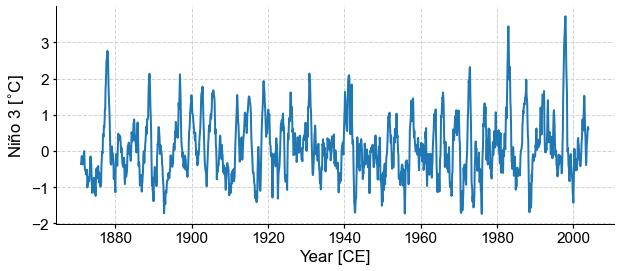

In [2]:
df = pd.read_csv('../data/wtc_test_data_nino_even.csv')
ts_nino = pyleo.Series(time =  df['t'], value = df['nino'],
                  time_name = 'Year', value_name = 'Niño 3',
                  time_unit = 'CE', value_unit = '$^{\circ}$C')

fig, ax = ts_nino.plot()

### Slicing
Passing a list containing a pair of dates to `.slice()` will return the time slice of interest.

In [4]:
ts_slice = ts_nino.slice([1972, 1998])

<AxesSubplot:xlabel='Year [CE]', ylabel='Niño 3 [$^{\\circ}$C]'>

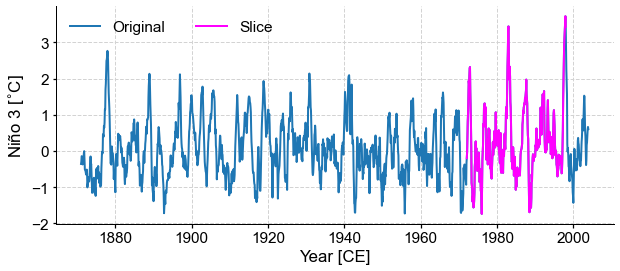

In [5]:
fig, ax = ts_nino.plot(label='Original',  lgd_kwargs={'ncol': 2}, zorder=99)
ts_slice.plot(label='Slice',  ax=ax, zorder=99, lgd_kwargs={'ncol': 2},**{'color':'magenta'})

### Stats
Calling `.stats()` will return a handy dictionary of summary statistics (mean, median, min, max, standard deviation, and the interquartile range ([IQR](https://en.wikipedia.org/wiki/Interquartile_range)))

In [5]:
ts_nino.stats()

{'mean': 0.07816584993097744,
 'median': -0.022333334,
 'min': -1.739667,
 'max': 3.724903,
 'std': 0.8216852391761659,
 'IQR': 1.015916675}

### Standardizing
Calling `.standardize()` subtracts the mean of the series and divides by the standard deviation.

In [6]:
ts_nino_std = ts_nino.standardize()
ts_nino_std.stats()

{'mean': 2.6712132923312036e-17,
 'median': -0.12230861543982396,
 'min': -2.2123226306871038,
 'max': 4.4381193384042,
 'std': 1.0,
 'IQR': 1.2363817999439464}

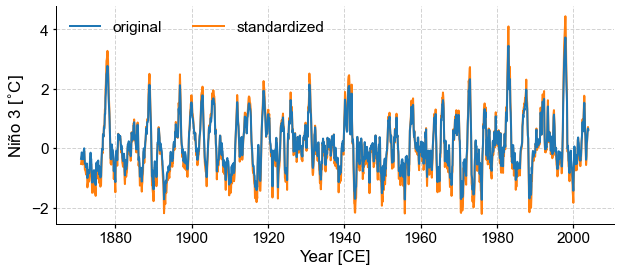

In [7]:
fig, ax = ts_nino.plot(label='original', zorder=99)
ax = ts_nino_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})

### Gaussianize
Calling `.gaussianize()` maps the series to a standard Gaussian distribution. Not only will it have  unit standard deviation ($\sigma=1$), a mean (and median) of 0, but its distribution is now the famed Bell Curve. This may be useful for methods that require data to be normally distributed.

In [8]:
ts_nino_gaus = ts_nino.gaussianize()
ts_nino_gaus.stats()

{'mean': 1.7808088615541357e-17,
 'median': 0.0,
 'min': -3.4198457991442184,
 'max': 3.4198457991442184,
 'std': 0.9995910124024004,
 'IQR': 1.347994295650057}

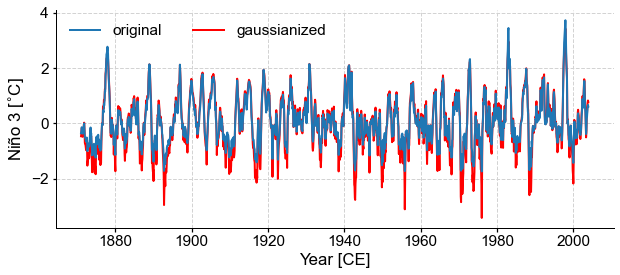

In [9]:
fig, ax = ts_nino.plot(label='original', zorder=99)
ax = ts_nino_gaus.plot(label='gaussianized', ax=ax, lgd_kwargs={'ncol': 2}, **{'color':'red'})

Plotting all of them together:

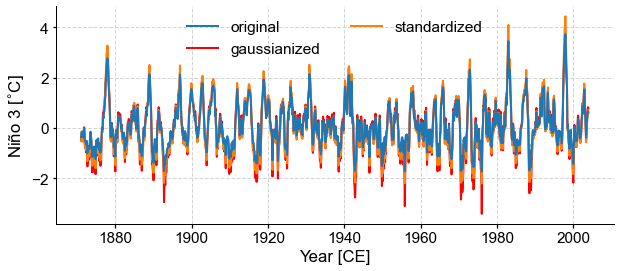

In [10]:
fig, ax = ts_nino.plot(label='original', zorder=99)
ax = ts_nino_gaus.plot(label='gaussianized', ax=ax, lgd_kwargs={'ncol': 2}, **{'color':'red'})
ax = ts_nino_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})

### Comparison
For context, it is interesting to compare the different treatments. [Seaborn](https://seaborn.pydata.org/index.html) is a very useful plotting library that works very nicely with [Pandas](https://pandas.pydata.org). To produce this quick comparison, we will make a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/frame.html) with two columns: value, and 'label', corresponding to the value from one of our three [`Series`](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#series-pyleoclim-series) and the treatment it stemmed from. Seaborn will happily ingest this dataframe and return a [kernel density plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) summarizing the density of power for each value for each treatment. 

In [25]:
df_comp = pd.concat([pd.DataFrame({'value': ts_nino.value, 'label':['original' for ik in ts_nino.value]}), 
                     pd.DataFrame({'value': ts_nino_gaus.value, 'label':['gaussianized' for ik in ts_nino_gaus.value]}), 
                     pd.DataFrame({'value': ts_nino_std.value, 'label':['standardized' for ik in ts_nino_std.value]})], axis=0).reset_index()
# df_comp = df_comp.reset_index()

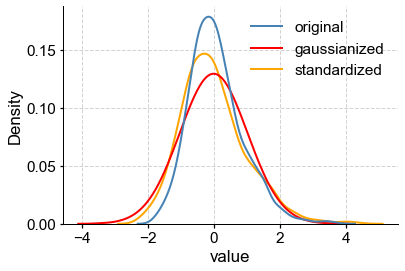

In [26]:
ax = sns.kdeplot(data=df_comp, x ='value', hue='label', palette={'original':'steelblue', 'gaussianized':'red', 'standardized':'orange'})
ax.legend_.set_title(None)